# Domácí úkol


# Sparse matice (sousednosti)
Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). 

Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
- hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
- mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

**Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:**
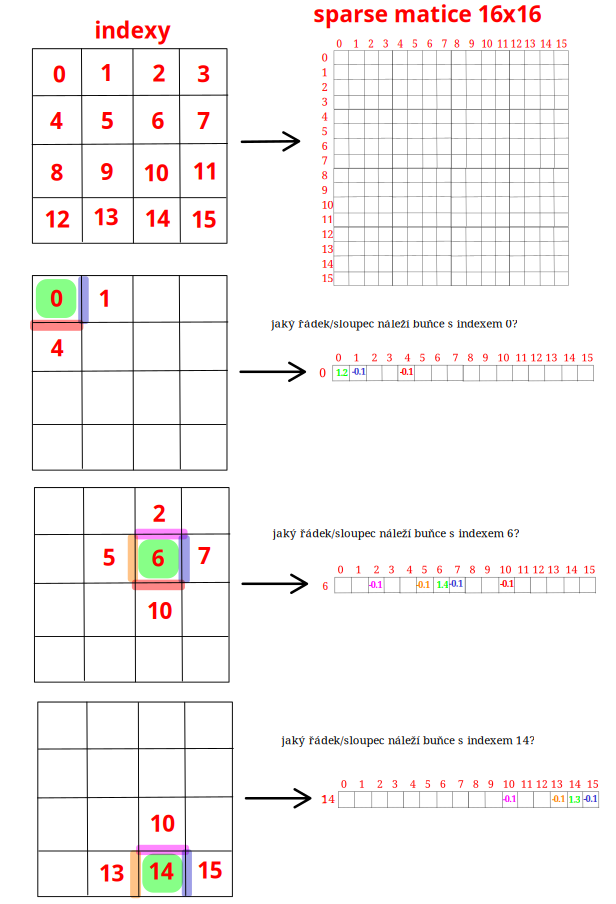

Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```

## Úkol 1.
**Sestavte matici pomocí formátu `LIL` a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě.** 
 - vypište a vykreslete jako obrázek pro $n=3$ a $\varepsilon = 0.1$.
 - vykreslete jako obrázek pro $n=100$ a $\varepsilon = 0.2$. 

In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import lil_matrix


In [5]:
def build_sparse_grid(size=3, eps=0.1):
    total = size * size
    mat = sp.lil_matrix((total, total))

    for cell in range(total):
        y = cell // size
        x = cell % size
        linked = 0

        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < size and 0 <= nx < size:
                neighbor_id = ny * size + nx
                mat[cell, neighbor_id] = -eps
                linked += 1

        mat[cell, cell] = 1 + eps * linked

    return mat

grid_matrix = build_sparse_grid(3, 0.1)
print(grid_matrix.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


In [6]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix


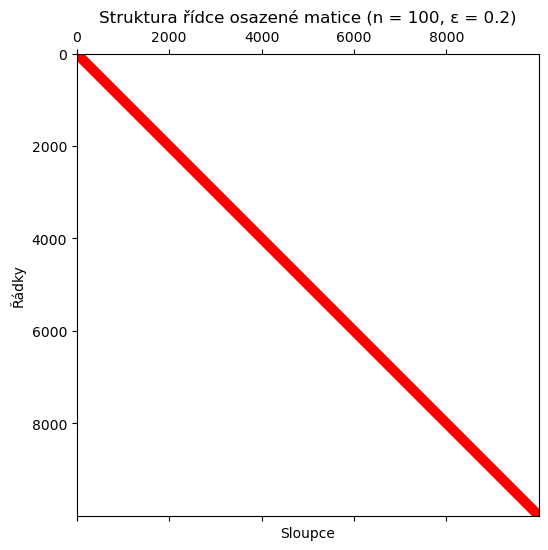

In [7]:
def build_sparse_grid(size=100, eps=0.2):
    total = size * size
    mat = sp.lil_matrix((total, total))

    for cell in range(total):
        y = cell // size
        x = cell % size
        linked = 0

        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < size and 0 <= nx < size:
                neighbor_id = ny * size + nx
                mat[cell, neighbor_id] = -eps
                linked += 1

        mat[cell, cell] = 1 + eps * linked

    return mat
A_large = build_sparse_grid(100, 0.2).tocsr()

plt.figure(figsize=(6, 6))
plt.spy(A_large, markersize=0.5, color='red')
plt.title("Struktura řídce osazené matice (n = 100, ε = 0.2)")
plt.xlabel("Sloupce")
plt.ylabel("Řádky")
plt.grid(False)
plt.show()


## Úkol 2. 

Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
- Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
- Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

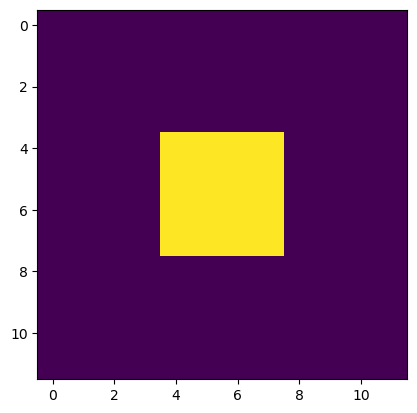

In [8]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = build_sparse_grid(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

/tmp/ipykernel_4212/699311731.py:4: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(A, b)


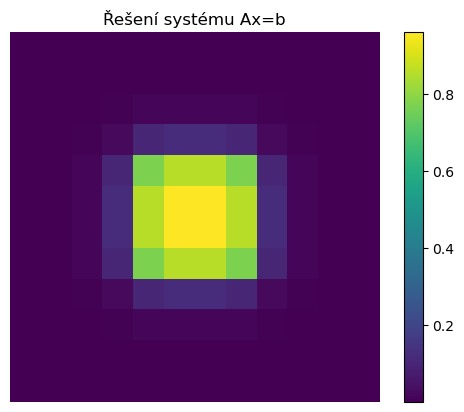

In [9]:
import scipy.sparse.linalg as spla
from scipy.sparse.linalg import spsolve

x = spsolve(A, b)
plt.imshow(x.reshape((n, n)), cmap='viridis')
plt.title("Řešení systému Ax=b")
plt.colorbar()
plt.axis('off')
plt.show()


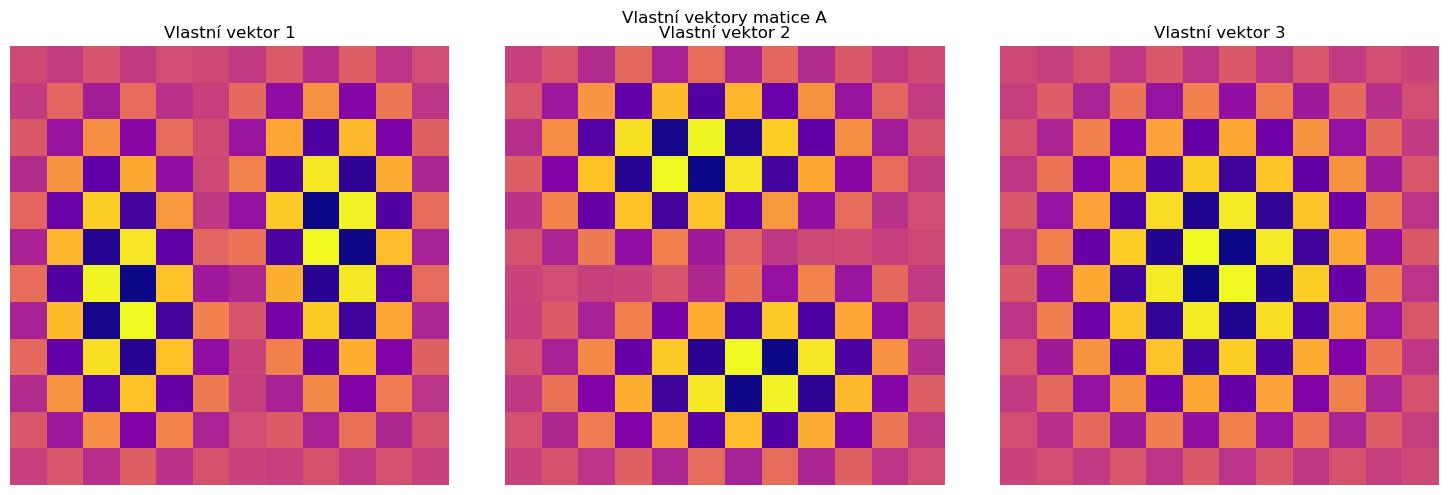

In [14]:
import scipy.sparse.linalg as spla

e_vals, e_vecs = spla.eigsh(A, k=3, which='LM')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(e_vecs[:, i].reshape((n, n)), cmap='plasma')
    axs[i].set_title(f"Vlastní vektor {i+1}")
    axs[i].axis('off')
plt.suptitle("Vlastní vektory matice A")
plt.tight_layout()
plt.show()



# Bonusový úkol

**Sestavte matici $A$ z úkolu 1. bez použití cyklů.**
- porovnejte výsledky z úkolu 1 a 2 pro různé hodnoty $n$ a $\varepsilon$.

Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. 

Hint, jak na to: 
- Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
    - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
        - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
        - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
    - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
        - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
- Tyto pole vytvořte vektorizovaně - bez cyklů

In [16]:
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    idx = np.arange(n * n).reshape(n, n)
    horizontal_up_idx = idx[:, :-1].flatten()
    horizontal_low_idx = idx[:, 1:].flatten()
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_low_idx))
    col_horizontal = np.hstack((horizontal_low_idx, horizontal_up_idx))
    data_horizontal = -epsilon * np.ones(len(row_horizontal))

    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten()
    idx_v = np.arange(n * n).reshape(n, n).T
    vertical_left_idx = idx_v[:, :-1].flatten()
    vertical_right_idx = idx_v[:, 1:].flatten()
    row_vertical = np.hstack((vertical_left_idx, vertical_right_idx))
    col_vertical = np.hstack((vertical_right_idx, vertical_left_idx))
    data_vertical = -epsilon * np.ones(len(row_vertical))

    ## --- Diagonála
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # Okraje – odečteme epsilon
    data_diag[idx[0, :]] -= epsilon      # horní hrana
    data_diag[idx[-1, :]] -= epsilon     # dolní hrana
    data_diag[idx[:, 0]] -= epsilon      # levá hrana
    data_diag[idx[:, -1]] -= epsilon     # pravá hrana

    ## --- Spojení všech vektorů
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # Výsledná matice
    A_efficiently = csr_matrix((data, (row, col)), shape=(n * n, n * n))

    return A_efficiently

print(A_efficiently(n, epsilon).todense())



[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
